In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib as mpl


# Data Cleansing



In [327]:
df= pd.read_csv('https://api.covidtracking.com/v1/states/daily.csv',parse_dates=['date'])

upload census data that we will use with our covid data to determine values per thousand and hundred-thousand of each state's population

In [328]:
c=pd.read_csv('census2018.csv')

In [329]:
c.columns

Index(['Geographic Area Name', 'Estimate'], dtype='object')

In [330]:
c.columns= ['State','Population']

In [331]:
c['State'].head()

0     Colorado
1      Indiana
2     Kentucky
3    Louisiana
4     Illinois
Name: State, dtype: object

below is a dictionary where every state has a value of its abbreviation.

In [332]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

for every state in our census data, add its corresponding abbreviation, from the us_abbrev dictionary, to a list that will later be joined to the census data dataframe

In [333]:
state_list=[]
for s in c['State']:
    if s != 'United States':
        state_list.append(us_state_abbrev[s])

In [334]:
state_list

['CO',
 'IN',
 'KY',
 'LA',
 'IL',
 'IA',
 'NH',
 'AR',
 'DE',
 'MN',
 'MT',
 'ME',
 'NC',
 'GA',
 'AK',
 'AL',
 'VT',
 'NV',
 'WV',
 'OK',
 'WI',
 'PR',
 'VA',
 'ND',
 'SC',
 'OR',
 'WY',
 'CA',
 'MS',
 'CT',
 'TX',
 'MD',
 'FL',
 'MA',
 'DC',
 'UT',
 'NY',
 'NJ',
 'OH',
 'MO',
 'PA',
 'MI',
 'NE',
 'ID',
 'NM',
 'HI',
 'SD',
 'WA',
 'RI',
 'AZ',
 'TN',
 'KS']

In [335]:

state_list=np.array(state_list)

Add USA to end of list as it is not provided 

In [336]:
state_list=np.append(state_list,'USA')

In [337]:
state_list

array(['CO', 'IN', 'KY', 'LA', 'IL', 'IA', 'NH', 'AR', 'DE', 'MN', 'MT',
       'ME', 'NC', 'GA', 'AK', 'AL', 'VT', 'NV', 'WV', 'OK', 'WI', 'PR',
       'VA', 'ND', 'SC', 'OR', 'WY', 'CA', 'MS', 'CT', 'TX', 'MD', 'FL',
       'MA', 'DC', 'UT', 'NY', 'NJ', 'OH', 'MO', 'PA', 'MI', 'NE', 'ID',
       'NM', 'HI', 'SD', 'WA', 'RI', 'AZ', 'TN', 'KS', 'USA'], dtype='<U3')

In [338]:
c['state_code']=state_list

view the resulting c dataframe

In [339]:
c.head()

,State,Population,state_code
0,Colorado,5695564,CO
1,Indiana,6691878,IN
2,Kentucky,4468402,KY
3,Louisiana,4659978,LA
4,Illinois,12741080,IL


In [340]:
c.set_index('state_code')

,State,Population
state_code,,
CO,Colorado,5695564
IN,Indiana,6691878
KY,Kentucky,4468402
LA,Louisiana,4659978
IL,Illinois,12741080
IA,Iowa,3156145
NH,New Hampshire,1356458
AR,Arkansas,3013825
DE,Delaware,967171


In [341]:
c.set_index('state_code')

,State,Population
state_code,,
CO,Colorado,5695564
IN,Indiana,6691878
KY,Kentucky,4468402
LA,Louisiana,4659978
IL,Illinois,12741080
IA,Iowa,3156145
NH,New Hampshire,1356458
AR,Arkansas,3013825
DE,Delaware,967171


drop the full name of the state and turn this into a dictionary where the state abbreviation key has a value of the population

In [342]:
c=c.drop(columns='State')
c=c.set_index('state_code')
c=c.to_dict()

because there are some missing values, manually add in each missing value with their population based on 2018 census

In [343]:
c['Population']['AS']=55465 
c['Population']['GU']=165768
c['Population']['MP']=56882
c['Population']['VI']=106977

In [344]:
c

{'Population': {'CO': 5695564,
  'IN': 6691878,
  'KY': 4468402,
  'LA': 4659978,
  'IL': 12741080,
  'IA': 3156145,
  'NH': 1356458,
  'AR': 3013825,
  'DE': 967171,
  'MN': 5611179,
  'MT': 1062305,
  'ME': 1338404,
  'NC': 10383620,
  'GA': 10519475,
  'AK': 737438,
  'AL': 4887871,
  'VT': 626299,
  'NV': 3034392,
  'WV': 1805832,
  'OK': 3943079,
  'WI': 5813568,
  'PR': 3195153,
  'VA': 8517685,
  'ND': 760077,
  'SC': 5084127,
  'OR': 4190713,
  'WY': 577737,
  'CA': 39557045,
  'MS': 2986530,
  'CT': 3572665,
  'TX': 28701845,
  'MD': 6042718,
  'FL': 21299325,
  'MA': 6902149,
  'DC': 702455,
  'UT': 3161105,
  'NY': 19542209,
  'NJ': 8908520,
  'OH': 11689442,
  'MO': 6126452,
  'PA': 12807060,
  'MI': 9995915,
  'NE': 1929268,
  'ID': 1754208,
  'NM': 2095428,
  'HI': 1420491,
  'SD': 882235,
  'WA': 7535591,
  'RI': 1057315,
  'AZ': 7171646,
  'TN': 6770010,
  'KS': 2911510,
  'USA': 327167439,
  'AS': 55465,
  'GU': 165768,
  'MP': 56882,
  'VI': 106977}}

We now make a list of the state's population in order of how the states are listed in the covid dataframe.

In [345]:


statelist=[]
for s in df['state']:
    if s in c['Population'].keys():
        statelist.append(c['Population'][s])
    else:
        statelist.append(0)

In [346]:
statelist=np.array(statelist)

put these populations in a new column of the covid data 

In [347]:
df['state_pop']=statelist

We convert columns to be used to the type "float" in order to do calculations 

In [348]:
df['positive']=df['positive'].astype(float)
df['death']=df['death'].astype(float)
df['totalTestResults']=df['totalTestResults'].astype(float)

We make new columns that shows covid data relative to the state population in thousands or hundred thousands.

The new values are : death per hundred thousand of state population,  death increase today per hundred thousand,
tests per thousand of state population, positive cases per thousand, increase in positive cases per thousand, and test increase per thousand.

These new values make comparing covid data for different size states possible rather than only comparing  numbers.


In [349]:

df['death per hundred thous']=df['death']/(df['state_pop'].astype(int)/100000)
df['death increase per hun thousand']=df['deathIncrease']/(df['state_pop'].astype(int)/100000)
df['positive per thousand']=df['positive']/(df['state_pop'].astype(int)/1000)
df['positive increase per thousand']=df['positiveIncrease']/(df['state_pop'].astype(int)/1000)
df['tests per thousand']=df['totalTestResults']/(df['state_pop'].astype(int)/1000)
df['test increase per thousand']=df['totalTestResultsIncrease']/(df['state_pop'].astype(int)/1000)


we also want to know the average positive increase per day based on the past week.

first we must create a dataframe of data from the past week.

In [350]:
past_sev_days = df[df['date'] > dt.datetime.today()-dt.timedelta(days=7)]

In [351]:
past_sev_days.iloc[:,-7:].head()

,state_pop,death per hundred thous,death increase per hun thousand,positive per thousand,positive increase per thousand,tests per thousand,test increase per thousand
0,737438,5.424185,0.000000,8.772263,0.176286,517.924219,5.425541
1,4887871,46.359652,0.675141,26.676850,0.226684,198.534904,0.908166
2,3013825,28.966513,0.398165,21.293539,0.362994,248.325965,3.315720
3,55465,0.000000,0.000000,0.000000,0.000000,27.296493,0.000000
4,7171646,72.103392,0.571696,28.540310,0.101511,172.474771,1.961753


Now we attain the mean positive increase in cases per state from this past week's data.

In [352]:
avg_sev_inc = past_sev_days.groupby(['state']).mean()['positiveIncrease']

Convert this to a dictionary which we will later when we look up values in the order of states listed in our data frame, to make a list of mean positive increases in the order of their corresponding states.

In [353]:
avg_sev_inc=avg_sev_inc.to_dict()

In [354]:
avg_sev_inc

{'AK': 72.33333333333333,
 'AL': 1084.0,
 'AR': 632.8333333333334,
 'AS': 0.0,
 'AZ': 565.6666666666666,
 'CA': 4740.666666666667,
 'CO': 252.33333333333334,
 'CT': 145.0,
 'DC': 43.5,
 'DE': 67.16666666666667,
 'FL': 3534.6666666666665,
 'GA': 1932.6666666666667,
 'GU': 45.333333333333336,
 'HI': 228.66666666666666,
 'IA': 810.8333333333334,
 'ID': 257.1666666666667,
 'IL': 2372.3333333333335,
 'IN': 908.3333333333334,
 'KS': 695.3333333333334,
 'KY': 683.3333333333334,
 'LA': 904.1666666666666,
 'MA': -1045.3333333333333,
 'MD': 589.5,
 'ME': 23.833333333333332,
 'MI': 859.8333333333334,
 'MN': 784.8333333333334,
 'MO': 1337.5,
 'MP': 0.16666666666666666,
 'MS': 651.6666666666666,
 'MT': 128.0,
 'NC': 1529.6666666666667,
 'ND': 248.16666666666666,
 'NE': 338.8333333333333,
 'NH': 20.333333333333332,
 'NJ': 350.3333333333333,
 'NM': 128.33333333333334,
 'NV': 375.1666666666667,
 'NY': 761.5,
 'OH': 1184.0,
 'OK': 781.1666666666666,
 'OR': 218.0,
 'PA': 804.6666666666666,
 'PR': 281.83

We construct a list of average daily positive increases from the past 7 days, in the order of the states listed in the past_sev_days  dataframe.

In [355]:
avg_sev_list=[]
for s in past_sev_days['state']:
    avg_sev_list.append(avg_sev_inc[s])

add this ordered list of avg 7 day increase as a column in the dataframe of this past week's covid data.


In [356]:
past_sev_days['avg 7 day increase']=avg_sev_list
past_sev_days['avg 7 day increase per thousand']=avg_sev_list/(past_sev_days['state_pop'].astype(int)/1000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [357]:
past_sev_days.iloc[:,-9:].head()

,state_pop,death per hundred thous,death increase per hun thousand,positive per thousand,positive increase per thousand,tests per thousand,test increase per thousand,avg 7 day increase,avg 7 day increase per thousand
0,737438,5.424185,0.000000,8.772263,0.176286,517.924219,5.425541,72.333333,0.098087
1,4887871,46.359652,0.675141,26.676850,0.226684,198.534904,0.908166,1084.000000,0.221773
2,3013825,28.966513,0.398165,21.293539,0.362994,248.325965,3.315720,632.833333,0.209977
3,55465,0.000000,0.000000,0.000000,0.000000,27.296493,0.000000,0.000000,0.000000
4,7171646,72.103392,0.571696,28.540310,0.101511,172.474771,1.961753,565.666667,0.078875


create a dataframe of today's data, which we will use in our choropleth.

In [358]:

today =past_sev_days[past_sev_days['date']==past_sev_days['date'].max()]

In [359]:
today.iloc[:,-9:].head()

,state_pop,death per hundred thous,death increase per hun thousand,positive per thousand,positive increase per thousand,tests per thousand,test increase per thousand,avg 7 day increase,avg 7 day increase per thousand
0,737438,5.424185,0.000000,8.772263,0.176286,517.924219,5.425541,72.333333,0.098087
1,4887871,46.359652,0.675141,26.676850,0.226684,198.534904,0.908166,1084.000000,0.221773
2,3013825,28.966513,0.398165,21.293539,0.362994,248.325965,3.315720,632.833333,0.209977
3,55465,0.000000,0.000000,0.000000,0.000000,27.296493,0.000000,0.000000,0.000000
4,7171646,72.103392,0.571696,28.540310,0.101511,172.474771,1.961753,565.666667,0.078875


# Insights


Get descriptive statistics of all the new columns we created.
We show the states with the maximum and minumum value of each of our new column
We use the inverted version of our previous state dictionary to look up state names from state abbreviations.

In [360]:

inverted_state_dict = dict(map(reversed,us_state_abbrev.items()))


filtered=['death per hundred thous', 'tests per thousand',
       'positive per thousand', 'positive increase per thousand',
       'test increase per thousand', 'death increase per hun thousand',
       'avg 7 day increase', 'avg 7 day increase per thousand']
for f in filtered:
    max_state=today[today[f]==today[f].max()].iloc[0,1]
    min_state=today[today[f]==today[f].min()].iloc[0,1]
    print(f)
    print('max: '+ inverted_state_dict[max_state] + ' '+max_state)
    print('min: '+ inverted_state_dict[min_state]+ ' '+ min_state)
    print(today[f].describe())
    print('\n')

death per hundred thous
max: New Jersey NJ
min: American Samoa AS
count     56.000000
mean      42.645169
std       37.715871
min        0.000000
25%       16.073398
50%       31.550137
75%       57.398614
max      179.356391
Name: death per hundred thous, dtype: float64


tests per thousand
max: Rhode Island RI
min: American Samoa AS
count     56.000000
mean     235.797820
std       96.569634
min       27.296493
25%      176.938306
50%      214.581346
75%      257.213180
max      527.299811
Name: tests per thousand, dtype: float64


positive per thousand
max: Louisiana LA
min: American Samoa AS
count    56.000000
mean     15.596751
std       7.556465
min       0.000000
25%      10.595847
50%      15.632678
75%      21.054469
max      32.697365
Name: positive per thousand, dtype: float64


positive increase per thousand
max: North Dakota ND
min: American Samoa AS
count    56.000000
mean      0.157452
std       0.116297
min       0.000000
25%       0.068070
50%       0.143930
75%       

Visualize the descriptive statistics.
We make a boxplot for every new column to better visualize the descriptive stats data.
We graph them side by side then individually to get a closer look.

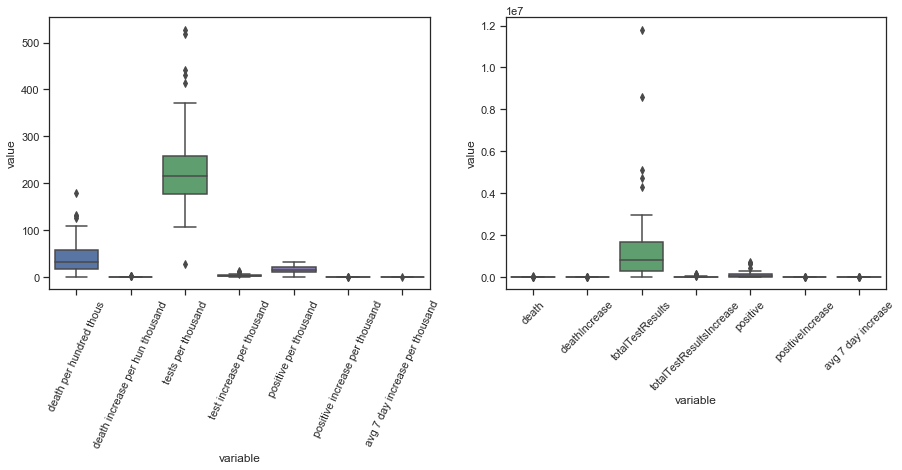

In [361]:
var=[ 'death per hundred thous','death increase per hun thousand', 'tests per thousand','test increase per thousand',
       'positive per thousand', 'positive increase per thousand','avg 7 day increase per thousand']


var_two = ['death','deathIncrease', 'totalTestResults', 'totalTestResultsIncrease',
       'positive', 'positiveIncrease',
       'avg 7 day increase']
mpl.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,2,1)

s=today[var].stack()
s=s.reset_index()
s.columns=['state_group','variable','value']
plt.xticks(rotation=65)
sns.boxplot(x='variable',y='value',data=s)

plt.subplot(1,2,2)
ss=today[var_two].stack()
ss=ss.reset_index()
ss.columns=['state_group','variable','value']
plt.xticks(rotation=45)
sns.boxplot(x='variable',y='value',data=ss)

We visualize the values that are relative to our population in each state (left). We also visualize the spread of the original numerical values from our covid dataset which did not account for state population (right). We will compare these at a closer level to evaluate the differences in outliers between the values relative to population (in red) versus the original values (in blue)



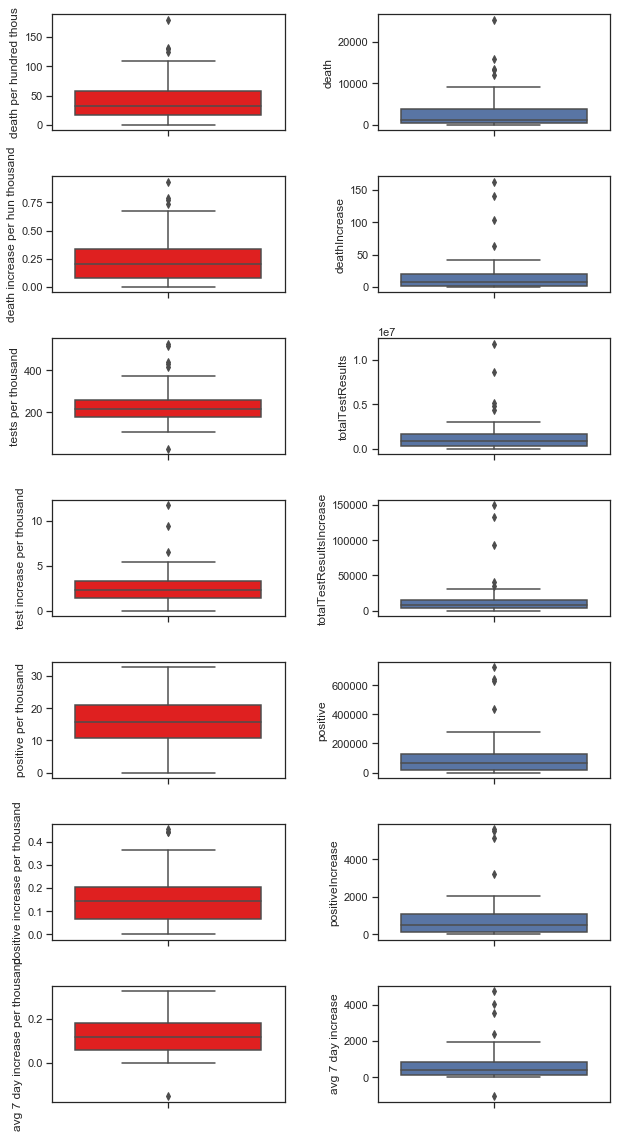

In [367]:
counter=0
fig, axes = plt.subplots(7, 2, figsize=(10,20))
#mpl.rcParams['figure.figsize'] = (10,5)

for i in range(len(var)):
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = sns.boxplot( y=var[i], data=today, color='red', 
        ax=axes[counter, 0])
   
    ax = sns.boxplot( y=var_two[i], data=today, 
        ax=axes[counter, 1])
    counter=counter+1

When we take a closer look at the third row,  we can see there is a concerning low outlier (whose state is AS or American Somoa) for the boxplot of "tests per thousand" (the number of tests per thousand of people in a state's population) that does not show up for "totalTestResults" (the number of total tests). This outlier that falls below the minimum  means that a state is underperforming in how many people it tests relative to the population, but the number of tests alone (not accounting for the population) is not so far below other states' number of tests enough for it to be an outlier for "totalTestResults" boxplot on the right.


When we look at the fifth row, we see there are no outliers for "positive per thousand" which is different from the boxplot for positives cases. This means that the states with very high numbers of positive cases, which are outliers in the "positive" boxplot on the right, have a population that is large enough that the amount of positive cases relative to the population (in thousands), is not  high enough ,relative to all states, to be an outlier.

In [368]:
t=today[today['tests per thousand']==today['tests per thousand'].min()]
t.loc[:,['state','tests per thousand']]

,state,tests per thousand
3,AS,27.296493


AS (American Somoa) is the low outlier for tests per thousand. But  we can view the minimum and maximum state for every category using the bar graphs below.

We make a bar graph to demonstrate every state's value for each of the columns we are interested in (death per hundred thousand, tests per thousand, positive cases per thousand, positive increase per thousand, test increase per thousand, death increase per hundred thousand, average 7 day increase, average 7 day increase per thousand).

We can compare the value that were relative to the population, to the original values.
We graph 'death', 'death per hundred thous','deathIncrease','death increase per hun thousand', 'totalTestResults', 'tests per thousand','totalTestResultsIncrease','test increase per thousand',
       'positive','positive per thousand', 'positiveIncrease','positive increase per thousand',
       'avg 7 day increase', 'avg 7 day increase per thousand']

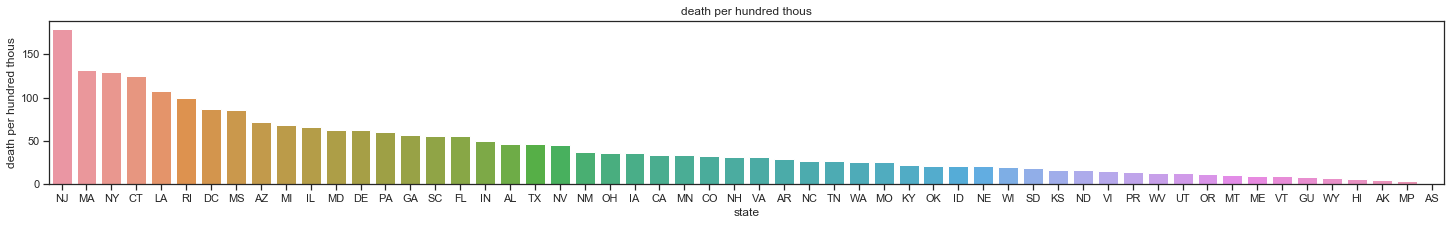

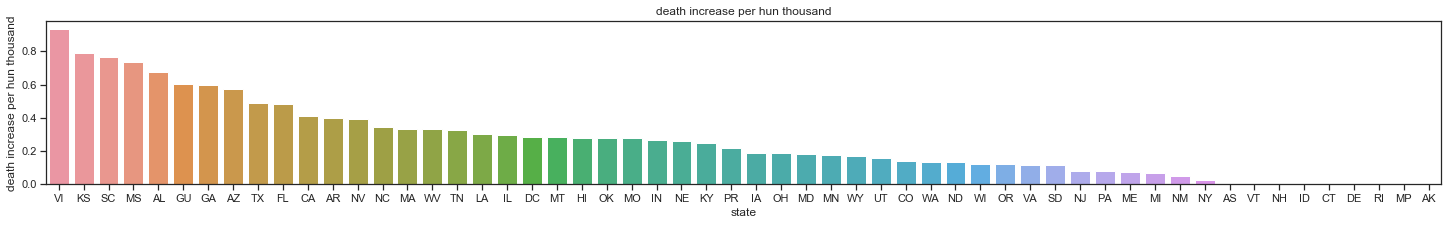

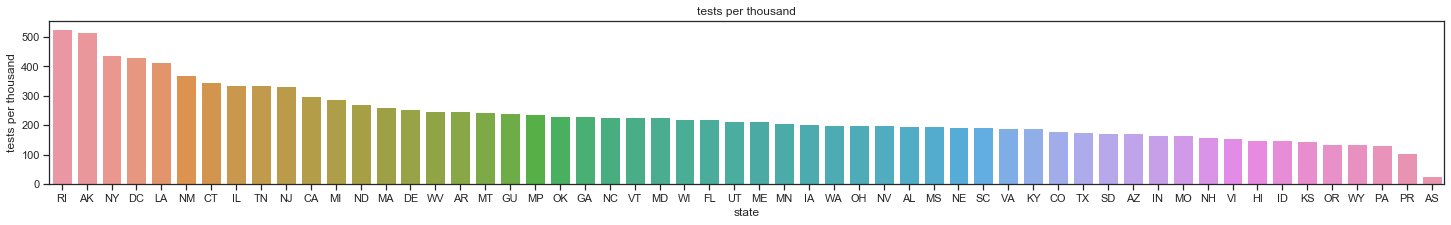

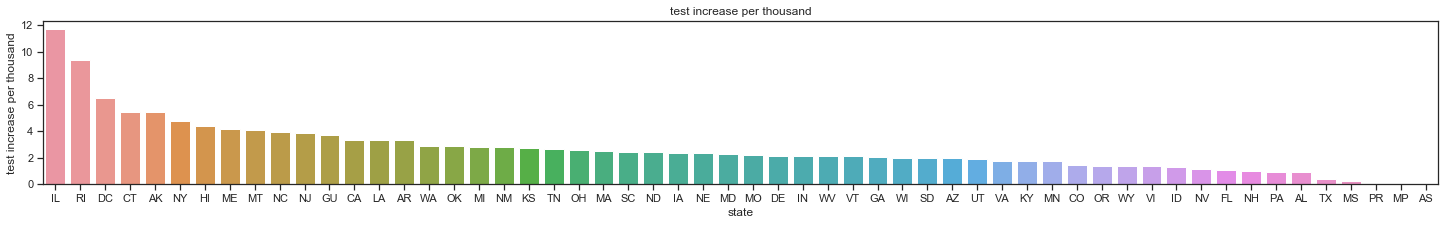

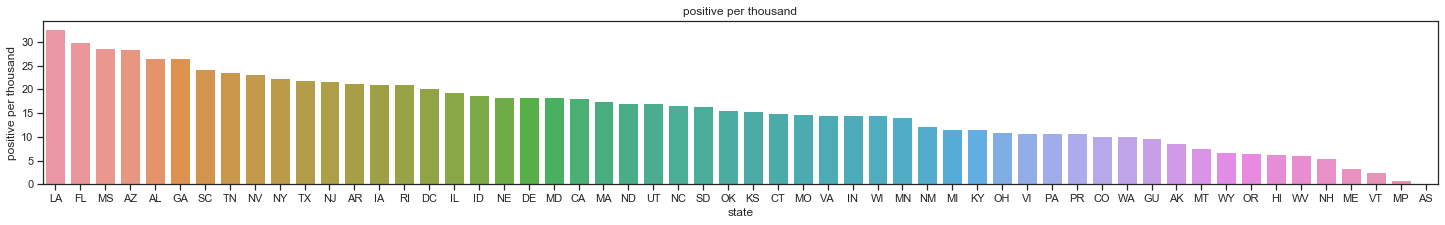

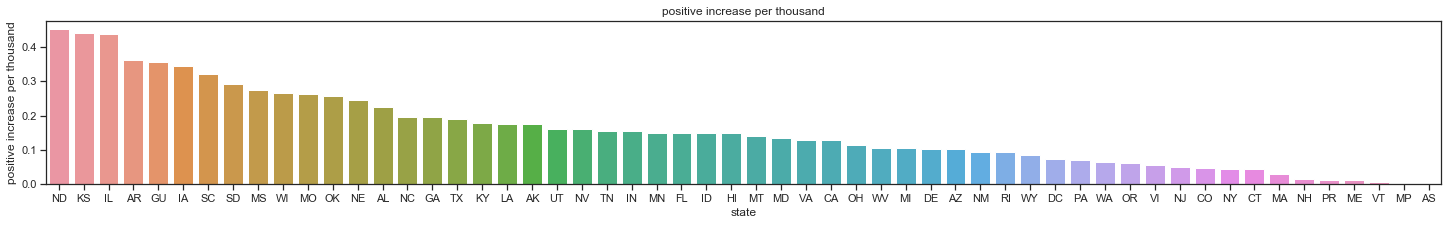

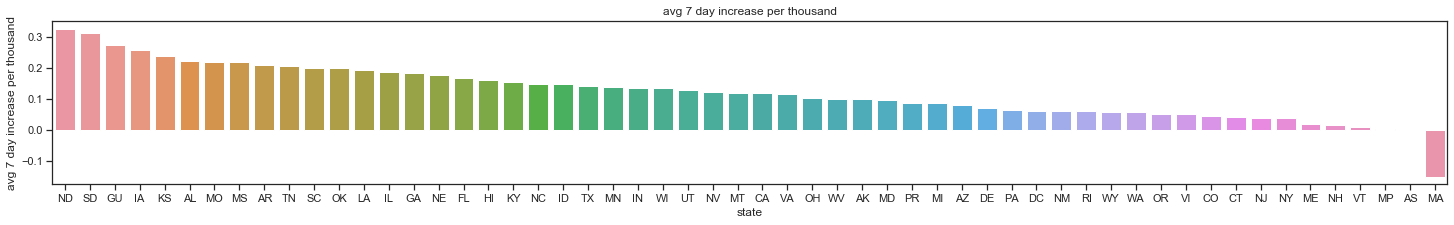

In [381]:


for v in var:
    fig, ax = plt.subplots(figsize=(25,3))
    ax=sns.barplot(x='state',y=v,data=today.sort_values(v,ascending=False))
    plt.xticks(rotation=0)
    plt.title(v)

We compare these below with bar graphs of their unadjusted values (blue)

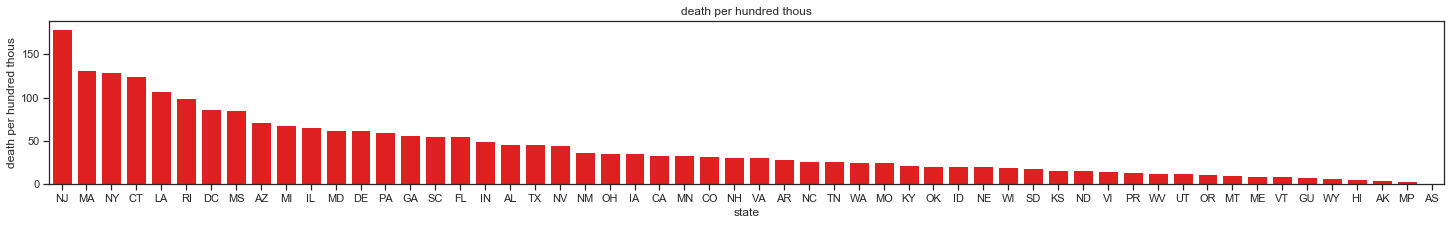

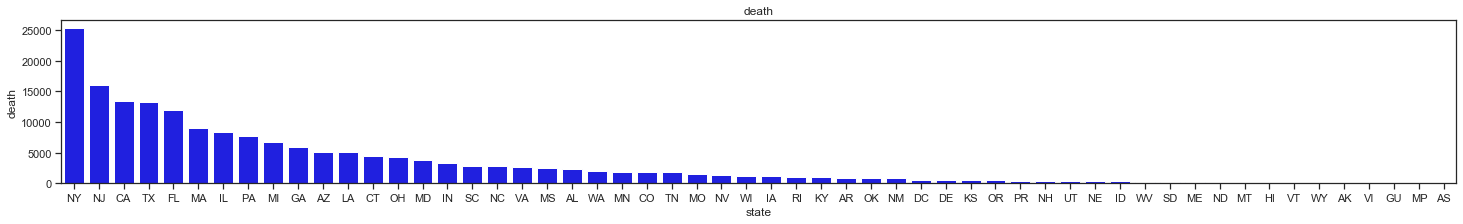

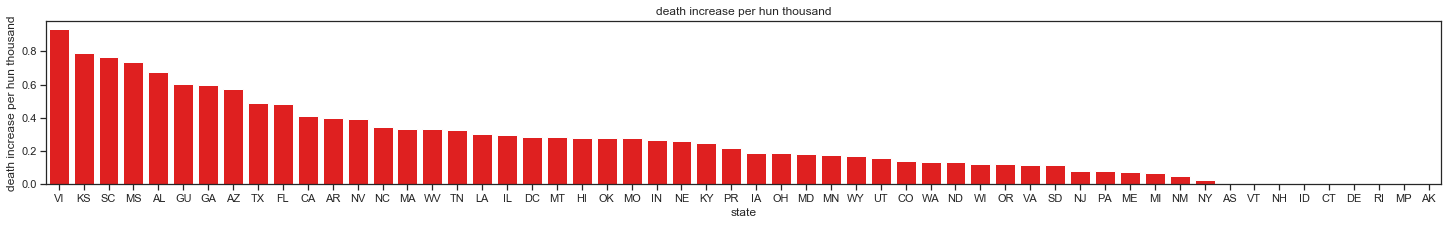

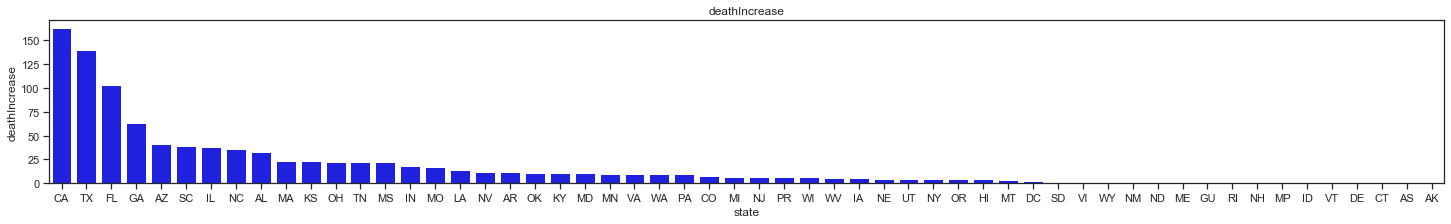

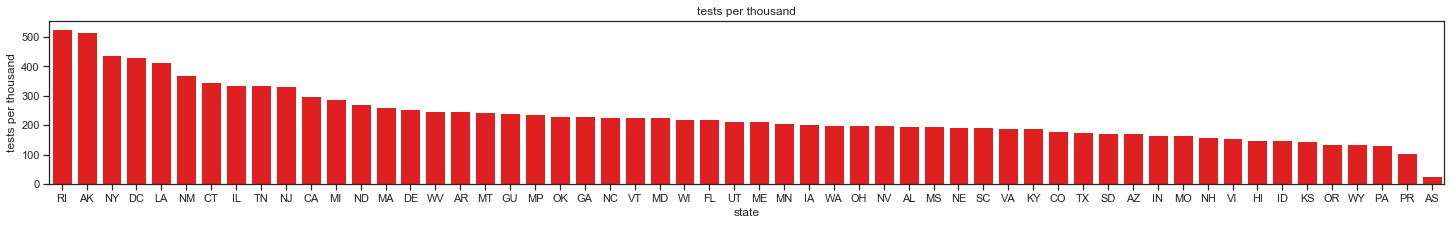

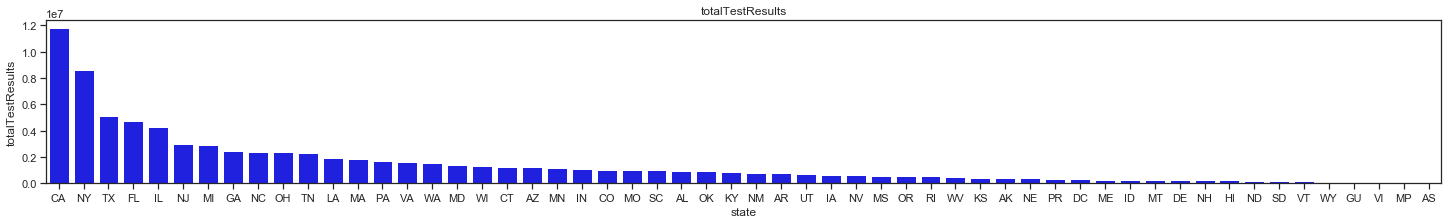

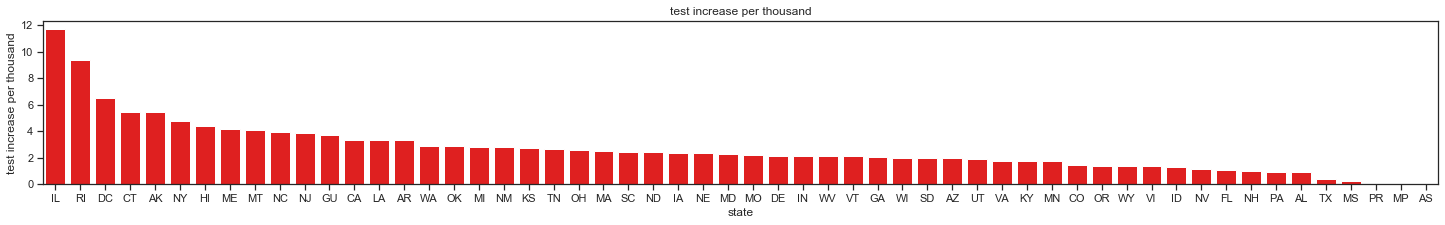

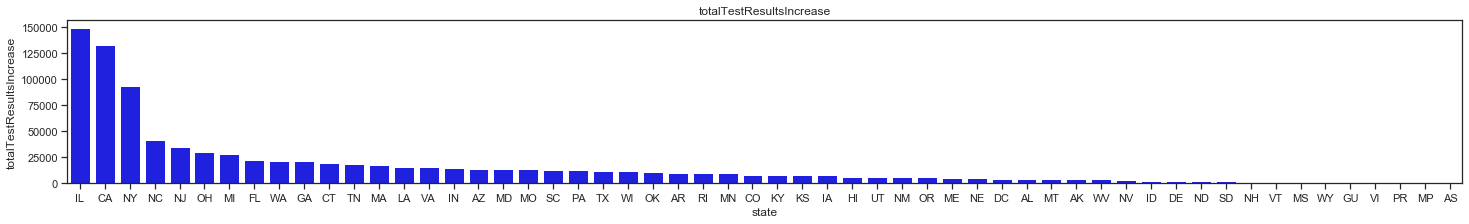

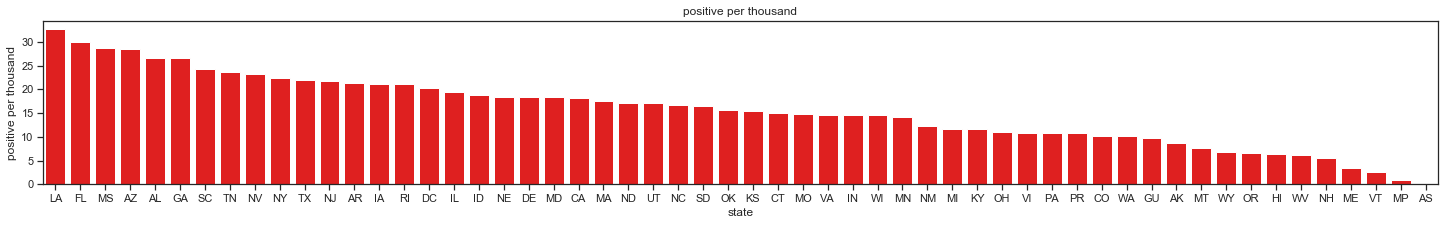

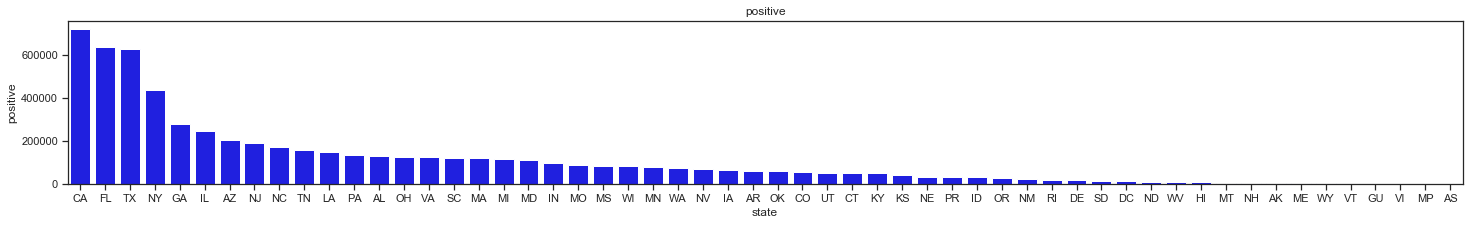

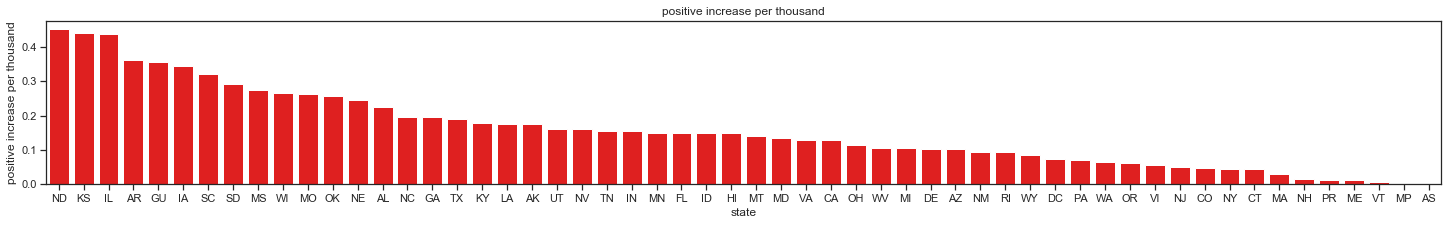

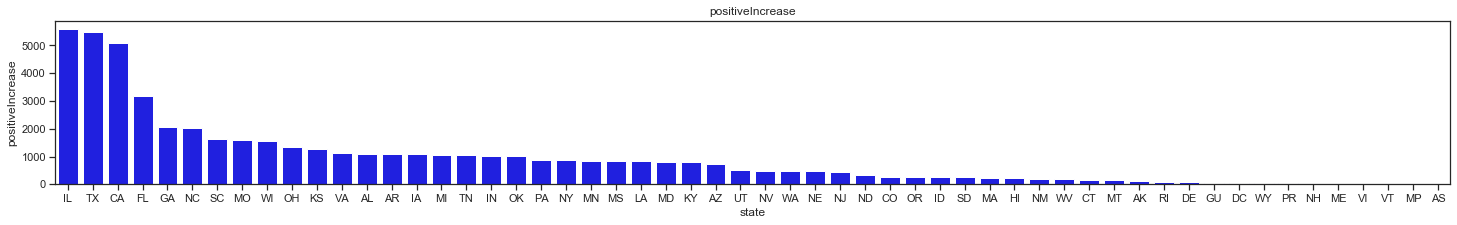

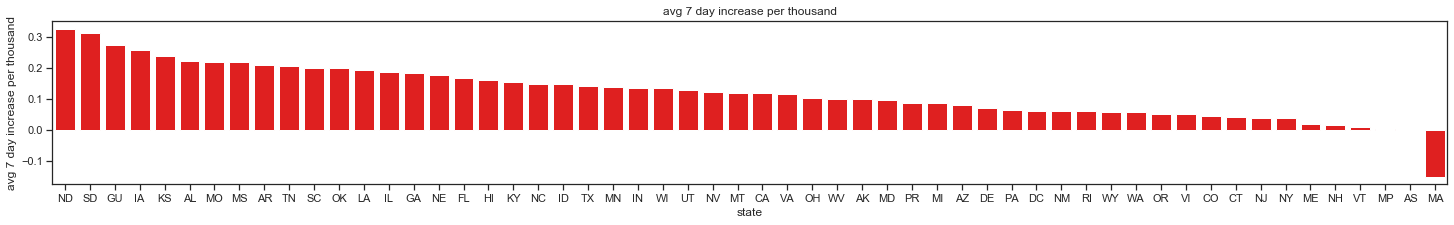

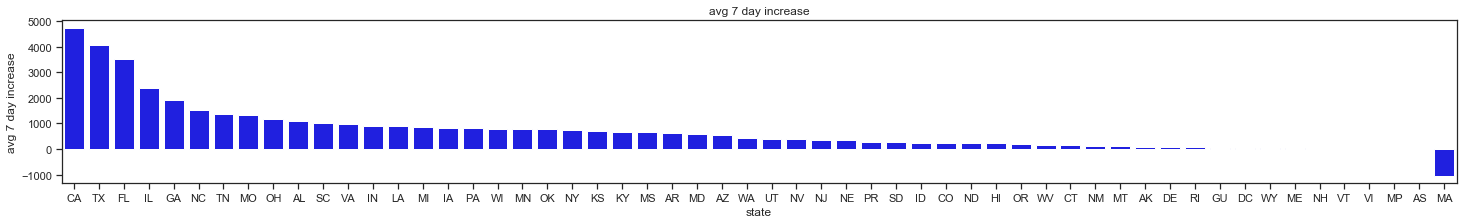

In [398]:
counter=0
for i in range(len(var)):
    plt.subplots(figsize=(25,3))
    fig.subplots_adjust(hspace=0.4, wspace=0.06)
    sns.barplot(x='state', y=var[i], data=today.sort_values(var[i],ascending=False), color='red')
    plt.title(var[i])
    plt.show()
    plt.subplots(figsize=(25,3))
    sns.barplot( x='state',y=var_two[i], data=today.sort_values(var_two[i],ascending=False), color='blue')
    plt.title(var_two[i])
    plt.show()


We notice that when we compare  state's  values relative to their population (red) , it shows a different picture than  the original covid data that does not account for population size (blue).
We see death per hundred thousand of the state's population, is highest in NJ, MA, and NY whereas the number of deaths only is highest in NY, NJ, and CA.

The number of additional deaths for today (death increase) was highest in CA, TX, and FL. But the number of additional deaths today per hundred thousand of the state's population, was greatest in VI, KS, and SC.

Total Test Results were highest in CA, NY and TX. But total test results per thousand were highest in RI, AK, and NY.

Total additional test results for today were highest in IL, CA and NY. However the  additional test results for today 
per thousand of the state's population were highest in IL, RI , and DC.


Total positive covid cases were highest in CA, FL and TX. However the positive cases
per thousand of the state's population were highest in LA,  FL and MS.

The increase in positive cases today was highest in IL, TX and CA. However the  additional positive cases
per thousand of the state's population today was highest in ND,  KS, and IL.

The daily average  increase in cases based on the past 7 days was highest in CA, TX and FL. However the daily average increase in cases based on the past 7 days was highest in ND,  SD, and GU.
